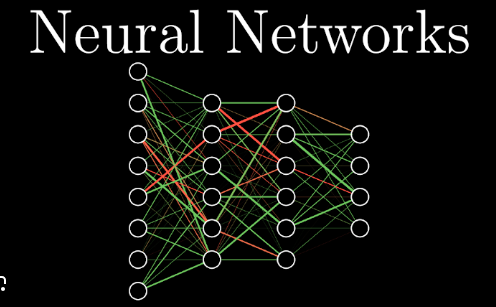

In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.18.0


In [ ]:
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(units=4, input_shape = (3,),
                       activation = "sigmoid"))
model.add(layers.Dense(units = 4, activation = "sigmoid"))
model.add(layers.Dense(units = 1, activation = "sigmoid"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compile the model
#Optimizer, Loss & Metrics
model.compile(optimizer = "SGD",
             loss = "mean_squared_error",
             metrics = ["accuracy"])

In [ ]:
#Get Data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

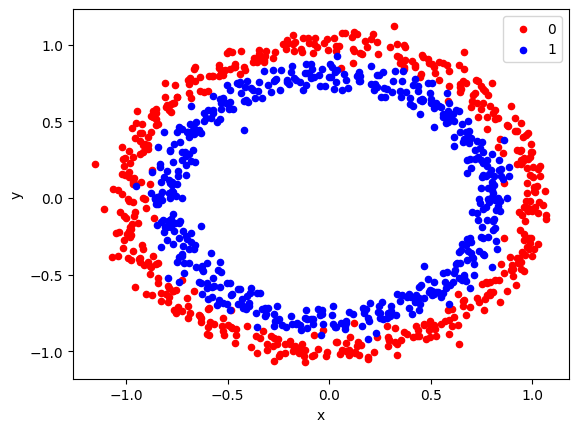

In [ ]:
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.05)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.1,random_state = 10)

#### Creating the model matching our data

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(units=4, input_shape = (2,),  # 2 features
                       activation = "sigmoid")) # 4 units in Hidden layer
model.add(layers.Dense(units = 4, activation = "sigmoid"))
model.add(layers.Dense(units = 1, activation = "sigmoid"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compile the model
#Optimizer, Loss & Metrics
model.compile(optimizer = "RMSprop",
             loss = "mean_squared_error",
             metrics = ["accuracy"])

In [ ]:
#Training of Deep Neural Network
history = model.fit(X_train,Y_train,
                   epochs = 1000,
                   validation_data = (X_test,Y_test))

Epoch 1/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4895 - loss: 0.2513 - val_accuracy: 0.5100 - val_loss: 0.2490
Epoch 2/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5067 - loss: 0.2506 - val_accuracy: 0.6100 - val_loss: 0.2489
Epoch 3/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5344 - loss: 0.2507 - val_accuracy: 0.5600 - val_loss: 0.2489
Epoch 4/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5215 - loss: 0.2504 - val_accuracy: 0.5800 - val_loss: 0.2489
Epoch 5/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4900 - loss: 0.2505 - val_accuracy: 0.6000 - val_loss: 0.2490
Epoch 6/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5143 - loss: 0.2502 - val_accuracy: 0.5400 - val_loss: 0.2490
Epoch 7/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4893 - loss: 0.2505 - val_accuracy: 0.5400 - val_loss: 0.2491
Epoch 8/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5008 - loss: 0.2503 - val_accuracy:

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_test

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.96049666],
       [0.47188744],
       [0.23795658],
       [0.2183348 ],
       [0.14903896],
       [0.9334414 ],
       [0.75777483],
       [0.4704324 ],
       [0.17236945],
       [0.89164025],
       [0.8517666 ],
       [0.09139684],
       [0.14771408],
       [0.76563567],
       [0.55471903],
       [0.48531124],
       [0.28495872],
       [0.5801813 ],
       [0.1628852 ],
       [0.307455  ],
       [0.27515048],
       [0.8966489 ],
       [0.6772549 ],
       [0.12392405],
       [0.17442042],
       [0.7490611 ],
       [0.34097692],
       [0.31520543],
       [0.05903491],
       [0.78151774],
       [0.05400439],
       [0.7367011 ],
       [0.3079169 ],
       [0.85148716],
       [0.17357108],
       [0.5307298 ],
       [0.34731975],
       [0.8367944 ],
       [0.8685704 ],
       [0.19836989],
       [0.04658787],
       [0.8653207 ],
       [0.9398031 ],
       [0.9024525 ],
       [0.73390067],
       [0.33482534],
       [0.94680417],
       [0.209

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred_test)

0.93

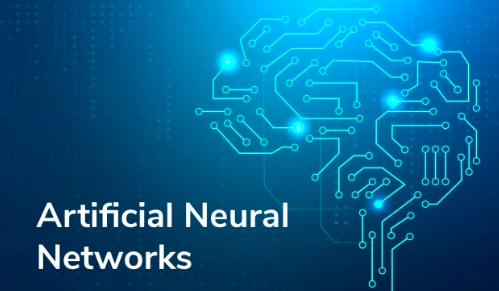

# Artificial Neural Network

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'

##   Data Preprocessing

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##  Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

##   Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.8037 - accuracy: 0.5185
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5291 - accuracy: 0.7901
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 0.7952
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4668 - accuracy: 0.7979
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.7994
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8049
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 0.8119
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8238
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.8355
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3720 - accura

##  Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


### Predicting the Test set results

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


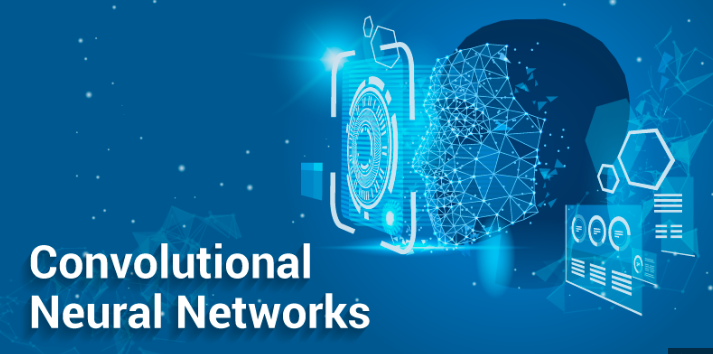

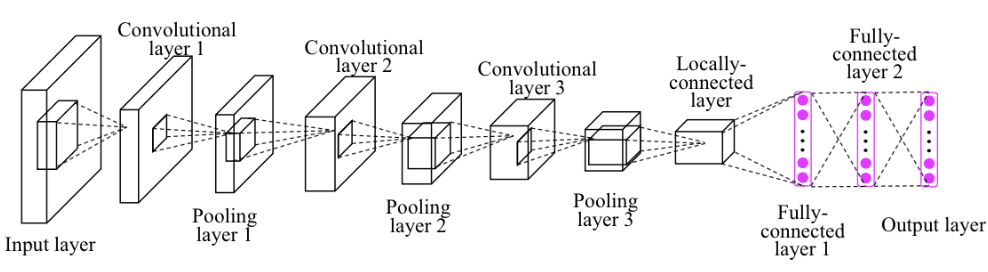

# Convolutional Neural Network (CNN)

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170508288/170498071 [==============================] - 3s 0us/step


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


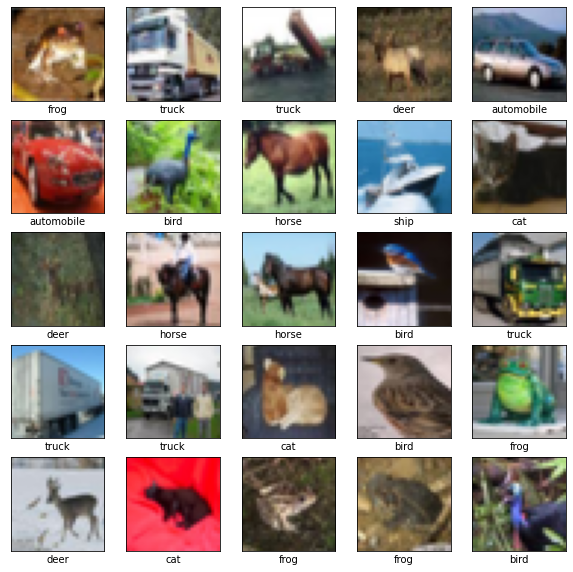

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of your model so far:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 19s 5ms/step - loss: 1.5151 - accuracy: 0.4447 - val_loss: 1.2641 - val_accuracy: 0.5520
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1558 - accuracy: 0.5911 - val_loss: 1.0951 - val_accuracy: 0.6121
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0081 - accuracy: 0.6475 - val_loss: 0.9823 - val_accuracy: 0.6555
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9130 - accuracy: 0.6788 - val_loss: 0.9514 - val_accuracy: 0.6675
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8377 - accuracy: 0.7076 - val_loss: 0.9264 - val_accuracy: 0.6786
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7789 - accuracy: 0.7279 - val_loss: 0.8869 - val_accuracy: 0.6928
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7284 - accuracy: 0.7439 - val_loss: 0.8881 - val_accuracy

### Evaluate the model

313/313 - 1s - loss: 0.8698 - accuracy: 0.7088 - 719ms/epoch - 2ms/step


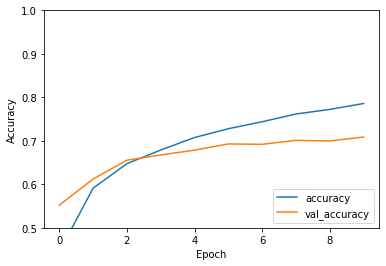

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7088000178337097


Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.

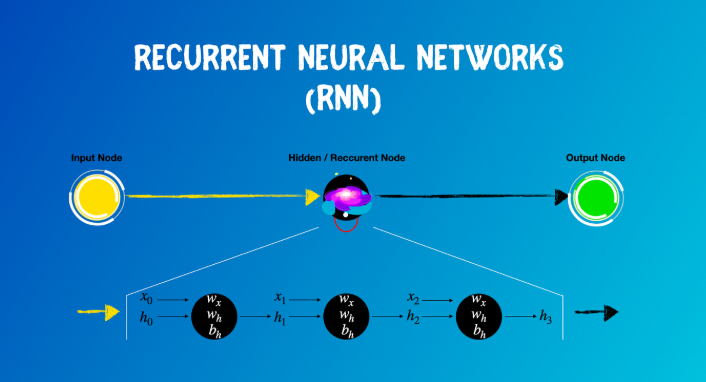

In [ ]:
#!pip install tensorflow-gpu==2.0.0rc0
#!pip install numpy==1.16.5

In [ ]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import imdb

In [ ]:
tf.__version__

'2.12.0'

### Setting up dataset parameters

In [ ]:
number_of_words = 20000
max_len = 100

### Loading the IMDB dataset


https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data

In [ ]:
number_of_words = 20000
max_len = 100

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=20000)

#(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=number_of_words)



17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
X_test.shape

(25000,)

In [ ]:
X_train

### Padding all sequences to be the same length

- pad_sequences is used to ensure that all sequences in a list have the same length.
- By default this is done by padding 0 in the beginning of each sequence.

In [ ]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)

In [ ]:
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

### Setting up Embedding Layer parameters

In [ ]:
vocab_size = number_of_words #20000
embed_size = 128

## Building a Recurrent Neural Network

### Defining the model

In [ ]:
model = tf.keras.Sequential()

### Adding the Embeding Layer

In [ ]:
# vocab_size = number_of_words #20000
# embed_size = 128

model.add(tf.keras.layers.Embedding(vocab_size, embed_size, input_shape=(X_train.shape[1],)))

### Adding the LSTM Layer

In [ ]:
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))

### Adding the Dense output layer


In [ ]:
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compiling the model

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [ ]:
model.fit(X_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
196/196 [==============================] - 30s 110ms/step - loss: 0.5526 - accuracy: 0.7027
Epoch 2/3
196/196 [==============================] - 12s 61ms/step - loss: 0.3492 - accuracy: 0.8535
Epoch 3/3
196/196 [==============================] - 8s 39ms/step - loss: 0.2886 - accuracy: 0.8847


### Evaluating the model

In [ ]:
test_loss, test_acurracy = model.evaluate(X_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.4387 - accuracy: 0.8358


In [ ]:
print("Test accuracy: {}".format(test_acurracy))

Test accuracy: 0.8357999920845032


#**PROJECT**

## Creating data to view and fit


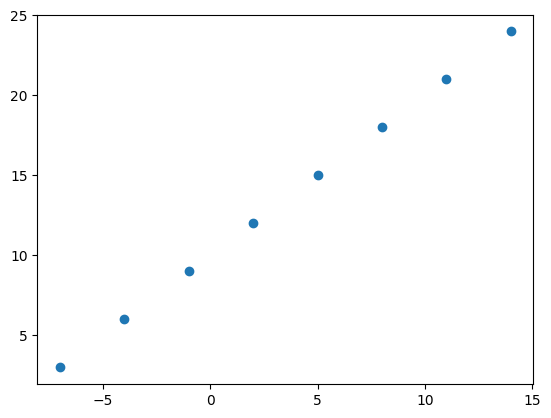

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Regression input shapes and output shapes



In [ ]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
house_info.shape

TensorShape([3])

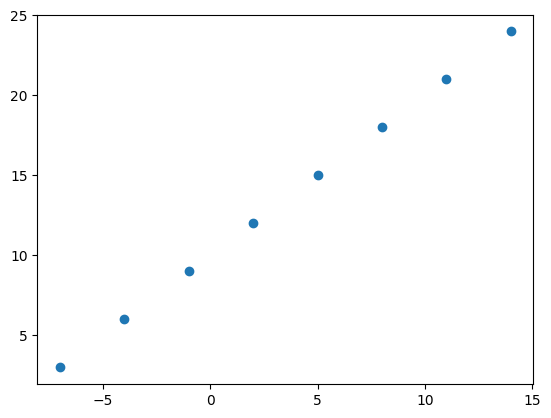

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

In [ ]:
# Let's take a look at the single examples invidually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)


![example of input and output shapes for a housing price prediction problem](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/01-input-and-output-shapes-housing-prices.png)


## Steps in modelling with TensorFlow


1. **Creating a model**
2. **Compiling a model**
3. **Fitting a model**


In [ ]:
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]], dtype=float32)>

#### expand_dims ???

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss      = tf.keras.losses.mae,        # MAE is short for 'mean absolute error'
              optimizer = tf.keras.optimizers.SGD(),  # SGD is short for 'stochastic gradient descent'
              metrics   = ["mae"] )

# Fit the model
#model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 13.3861 - mae: 13.3861
Epoch 2/5
1/1 [==============================] - 0s 22ms/step - loss: 13.2536 - mae: 13.2536
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 13.1211 - mae: 13.1211
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 12.9886 - mae: 12.9886
Epoch 5/5
1/1 [==============================] - 0s 33ms/step - loss: 12.8561 - mae: 12.8561


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 438ms/step


array([[3.5784304]], dtype=float32)

## Improving a model


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10, #verbose =0

In [ ]:
# Remind ourselves of what X and y are
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 108ms/step


array([[29.29099]], dtype=float32)

## Evaluating a model



In [ ]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

In [ ]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

Since $y=X+10$, we could make the labels like so:

In [ ]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Split data into training/test set


In [ ]:
# Check how many samples we have
len(X)

50

In [ ]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

## Visualizing the data


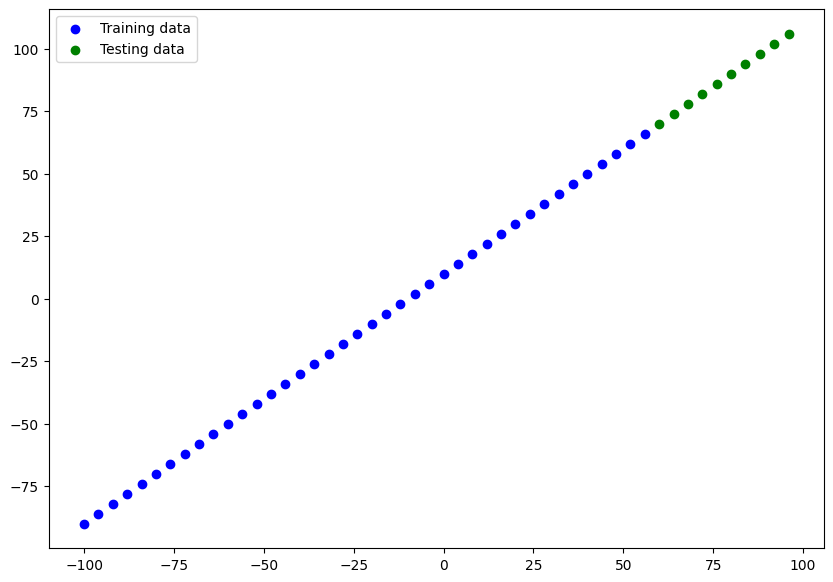

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
model.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100) # commented out on purpose (not fitting it just yet)

In [ ]:
tf.expand_dims(X_train,axis=-1)

## Visualizing the model


In [ ]:
# Doesn't work (model not fit/built)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# This will work after specifying the input shape
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

In [ ]:
# Check the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Visualizing the predictions


In [ ]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 148ms/step


In [ ]:
# View the predictions
y_preds

array([[56.504604],
       [60.18645 ],
       [63.868298],
       [67.55015 ],
       [71.232   ],
       [74.91385 ],
       [78.595695],
       [82.27755 ],
       [85.9594  ],
       [89.64124 ]], dtype=float32)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

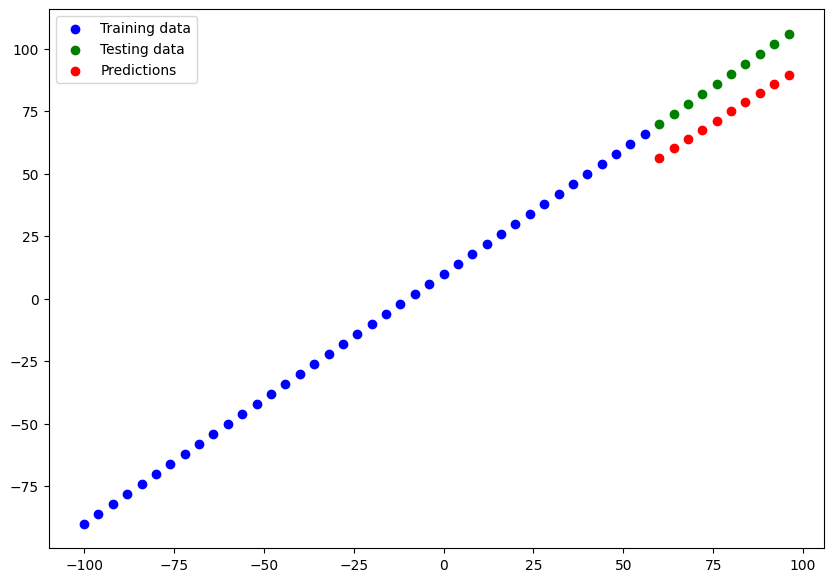

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)